In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('umfragedaten_v1_an.csv')

In [3]:
data.head(10)

,ID,GESCHL,GEBJAHR,BERUFSTAETIG,ARBEITSSTD,ARZTBES,RAUCH,GRO,GEW,SCHULABSCHLUSS,SCHULABSCHLUSS_V,SCHULABSCHLUSS_M,HOE_ABSCHLUSS,HOE_ABSCHLUSS_V,HOE_ABSCHLUSS_M,NETTO,ZUFR
0,1359,WEIBLICH,1967.0,NICHT ERWERBSTAETIG,NaN,1.0,JA,162.0,79.0,MITTLERE REIFE,MITTLERE REIFE,HOCHSCHULREIFE,LEHRE,"GEWERBL.,LANDW.LEHRE","MEISTER, TECHNIKER",475.0,10.0
1,2455,WEIBLICH,1964.0,HAUPTBERUFL.HALBTAGS,30.0,1.0,NEIN,165.0,59.0,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"MEISTER, TECHNIKER",KAUFMAENNISCHE LEHRE,780.0,9.0
2,200,MAENNLICH,1980.0,NICHT ERWERBSTAETIG,NaN,3.0,NEIN,166.0,86.0,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,NaN,8.0
3,1280,MAENNLICH,1968.0,HAUPTBERUFL.GANZTAGS,50.0,0.0,NEIN,180.0,95.0,FACHHOCHSCHULREIFE,MITTLERE REIFE,MITTLERE REIFE,FACHHOCHSCHULABSCHL.,KAUFMAENNISCHE LEHRE,KAUFMAENNISCHE LEHRE,NaN,8.0
4,2384,WEIBLICH,1995.0,NICHT ERWERBSTAETIG,NaN,1.0,NEIN,161.0,46.0,NOCH SCHUELER,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE",NOCH SCHUELER,"GEWERBL.,LANDW.LEHRE","GEWERBL.,LANDW.LEHRE",NaN,7.0
5,2258,MAENNLICH,1992.0,HAUPTBERUFL.HALBTAGS,13.0,0.0,NEIN,187.0,93.0,FACHHOCHSCHULREIFE,NaN,NaN,KEIN ABSCHLUSS,NaN,NaN,NaN,9.0
6,837,MAENNLICH,1967.0,HAUPTBERUFL.GANZTAGS,47.0,0.0,NEIN,194.0,96.0,ANDERER ABSCHLUSS,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE","MEISTER, TECHNIKER","GEWERBL.,LANDW.LEHRE",KEIN ABSCHLUSS,4000.0,8.0
7,1343,MAENNLICH,1989.0,NEBENHER BERUFSTAE.,NaN,1.0,NEIN,173.0,70.0,"VOLKS-,HAUPTSCHULE",OHNE ABSCHLUSS,OHNE ABSCHLUSS,KEIN ABSCHLUSS,KEIN ABSCHLUSS,KAUFMAENNISCHE LEHRE,400.0,9.0
8,3129,MAENNLICH,1960.0,HAUPTBERUFL.GANZTAGS,37.0,0.0,NEIN,175.0,85.0,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"GEWERBL.,LANDW.LEHRE",KAUFMAENNISCHE LEHRE,1100.0,8.0
9,2961,WEIBLICH,1952.0,HAUPTBERUFL.HALBTAGS,30.0,4.0,NEIN,170.0,110.0,FACHHOCHSCHULREIFE,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",HOCHSCHULABSCHLUSS,"GEWERBL.,LANDW.LEHRE",KAUFMAENNISCHE LEHRE,2000.0,8.0


In [7]:
data.shape

(3471, 17)

In [37]:
data = data.drop(data[data.NETTO.isna()].index)
data = data.drop(data[data.RAUCH.isna()].index)

In [38]:
data.shape

(2715, 17)

In [39]:
x = np.array(data.NETTO.values).reshape(-1,1)

In [40]:
data.RAUCH = data.RAUCH.replace('JA',1)
data.RAUCH = data.RAUCH.replace('NEIN',0)

In [41]:
y = np.array(data.RAUCH)

In [32]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [42]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [43]:
model.classes_

array([0., 1.])

In [48]:
y_pred = model.predict(x)
confusion_matrix(y, y_pred)

array([[1916,    0],
       [ 799,    0]])

Sehr viele false negatives und keine true positives. Das ist ein sehr schlechtes Modell!

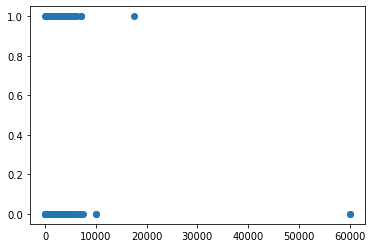

In [46]:
plt.plot(x,y,'o')
plt.show()

Diese Daten lassen sich nicht in eine logistische Regression fitten